In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df['size'].value_counts()
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

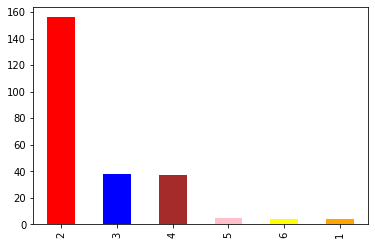

In [ ]:
df['size'].value_counts().plot(kind="bar",color=["red","blue","brown","pink","yellow","orange"])

In [ ]:
x_n = df.drop('size' , axis='columns')
x_n

,total_bill,tip,sex,smoker,day,time
0,16.99,1.01,Female,No,Sun,Dinner
1,10.34,1.66,Male,No,Sun,Dinner
2,21.01,3.50,Male,No,Sun,Dinner
3,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner
...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner
240,27.18,2.00,Female,Yes,Sat,Dinner
241,22.67,2.00,Male,Yes,Sat,Dinner
242,17.82,1.75,Male,No,Sat,Dinner


In [ ]:
y = df['size']
y

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()

In [ ]:
x_n['Sex'] = obj.fit_transform(x_n['sex'])
x_n['Smoker'] = obj.fit_transform(x_n['smoker'])
x_n['Time'] = obj.fit_transform(x_n['time'])
x_n['Day'] = obj.fit_transform(x_n['day'])
x_n

,total_bill,tip,sex,smoker,day,time,Sex,Smoker,Time,Day
0,16.99,1.01,Female,No,Sun,Dinner,0,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,1,0,0,2
2,21.01,3.50,Male,No,Sun,Dinner,1,0,0,2
3,23.68,3.31,Male,No,Sun,Dinner,1,0,0,2
4,24.59,3.61,Female,No,Sun,Dinner,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,1,0,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,0,1,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,1,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,1,0,0,1


In [ ]:
x = x_n.drop(['sex','smoker','day','time'],axis = 'columns')
x

,total_bill,tip,Sex,Smoker,Time,Day
0,16.99,1.01,0,0,0,2
1,10.34,1.66,1,0,0,2
2,21.01,3.50,1,0,0,2
3,23.68,3.31,1,0,0,2
4,24.59,3.61,0,0,0,2
...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,1
240,27.18,2.00,0,1,0,1
241,22.67,2.00,1,1,0,1
242,17.82,1.75,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
x1 = LogisticRegression()
x1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = x1.predict(x_test)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2
 4 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
accuracy_score(y_test,y_pred)

0.6326530612244898

In [ ]:
x2 = SVC()
x2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = x2.predict(x_test)
print(y_pred1)

[2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 4 2 2 2 2 2 2 2 2 2 2]


In [ ]:
accuracy_score(y_test,y_pred)

0.6326530612244898

In [ ]:
x3 = DecisionTreeClassifier()
x3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = x3.predict(x_test)
print(y_pred)

[3 2 3 2 2 2 5 2 2 2 4 2 2 2 2 2 4 4 3 4 2 3 2 2 2 2 2 2 3 4 4 1 2 3 3 4 2
 3 2 2 2 2 3 2 3 2 2 4 2]


In [ ]:
accuracy_score(y_test,y_pred)

0.4897959183673469

In [ ]:
x4 = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
x4.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = x4.predict(x_test)
print(y_pred)

[3 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 3 6 2 3 2 2 3 2 2 2 3 4 4 2 3 2 3 2 2
 4 2 4 2 2 2 2 2 2 2 4 2]


In [ ]:
accuracy_score(y_test,y_pred)

0.6122448979591837